In [1]:
import re
import sys
import datetime
sys.path.append("..")
import requests


# Fetch History data per day
def fetch_data(code,STname):
    Try = ['0.','1.','9.']
    times = 0
    for i in Try:
        STcode = i + code
        print(STcode)
        url = 'http://push2his.eastmoney.com/api/qt/stock/kline/get?cb=jQuery112407292853170751195_1640541924684&fields1=f1%2Cf2%2Cf3%2Cf4%2Cf5%2Cf6&fields2=f51%2Cf52%2Cf53%2Cf54%2Cf55%2Cf56%2Cf57%2Cf58%2Cf59%2Cf60%2Cf61&ut=7eea3edcaed734bea9cbfc24409ed989&klt=101&fqt=1&secid=' + STcode + '&beg=0&end=20500000&_=1640541924720'
        text = (requests.get(url)).text
        STname_fetch = text[text.find('\"name\":\"') + 8:text.find('\"name\":"') + 8 + len(STname)]
        STdata = text[text.find('\"data\":') + 7:text.find('\"data\":') + 11]
        times += 1
        if STname_fetch == STname and STdata != 'null':
            ST = text[text.find('\"klines\":') + 9:text.rfind(']}})') + 1]
            return ST
        else:
            if times < 3: continue
            else:
                raise ValueError('Wrong STcode or STname. Please check again.')



In [2]:
import json
import pandas as pd

# Convert text into Dataframe
a = input('Please enter your interested Stock\'s code: ')
b = input('Please enter your interested Stcode\'s name: ')
dt = fetch_data(a,b)
df = []
x = json.loads(dt)

for item in x:
    item = list(item.split(','))
    df.append(item)

#columns=['Date','Opening Price', 'Closing Price', 'Highest Price','Lowest Price','Trade Volumn','Turnover','price amplitude','Fluctuation(in percent)','Fluctuation(in price)','Turnover Rate']
df = pd.DataFrame(df,columns=['Date','Opening Price', 'Closing Price', 
                              'Highest Price','Lowest Price','Trade Volumn','Turnover',
                              'price amplitude','Fluctuation(in percent)','Fluctuation(in price)','Turnover Rate'])


# Tidy
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'])
min_date = min(df['Date'])
max_date = max(df['Date'])
df = df.set_index('Date')
df = df.astype(float)
df.head()

Please enter your interested Stock's code: 300588
Please enter your interested Stcode's name: 熙菱信息
0.300588


,Opening Price,Closing Price,Highest Price,Lowest Price,Trade Volumn,Turnover,price amplitude,Fluctuation(in percent),Fluctuation(in price),Turnover Rate
Date,,,,,,,,,,
2017-01-05,3.59,4.32,4.32,3.59,93.0,65299.0,24.58,45.45,1.35,0.04
2017-01-06,4.77,4.77,4.77,4.77,13.0,10166.0,0.00,10.42,0.45,0.01
2017-01-09,5.25,5.25,5.25,5.25,25.0,21070.0,0.00,10.06,0.48,0.01
2017-01-10,5.79,5.79,5.79,5.79,3.0,2838.0,0.00,10.29,0.54,0.00
2017-01-11,6.39,6.39,6.39,6.39,22.0,22902.0,0.00,10.36,0.60,0.01


In [3]:
# Subsection
#start_date = pd.to_datetime(input('Please input the start date of the time interval you are interested in (yyyy-mm-dd): '))
#end_date = pd.to_datetime(input('Please input the end date of the time interval you are interested in (yyyy-mm-dd): '))
#start_date = max(start_date,min_date)
from datetime import timedelta 
end_date = max_date
start_date = max(min_date + datetime.timedelta(0,3),max_date - timedelta(days=1500))

print('The time interval we are using is from {} to {}'.format(start_date,end_date))

df_foc = df[start_date:end_date]
df = df_foc.reset_index()
df_resample_mon = df_foc.resample(rule = 'M', label='right', closed='right').mean()
df_resample_year = df_foc.resample(rule = 'Y', label='right', closed='right').mean()

The time interval we are using is from 2017-11-19 00:00:00 to 2021-12-28 00:00:00


In [4]:
df_resample_mon

,Opening Price,Closing Price,Highest Price,Lowest Price,Trade Volumn,Turnover,price amplitude,Fluctuation(in percent),Fluctuation(in price),Turnover Rate
Date,,,,,,,,,,
2017-11-30,21.738889,21.430000,22.035556,20.956667,20858.111111,7.169102e+07,4.945556,-1.224444,-0.280000,8.342222
2017-12-31,19.067619,18.931429,19.356667,18.634762,11210.000000,3.451295e+07,3.763333,-0.560952,-0.116190,4.483810
2018-01-31,18.374091,18.430909,18.832273,18.043636,12878.590909,3.850267e+07,4.270000,0.197727,0.032273,4.342727
2018-02-28,15.789333,15.813333,16.257333,15.414667,16273.733333,4.248226e+07,5.317333,-0.252000,-0.068000,5.201333
2018-03-31,18.763636,18.968636,19.464545,18.432273,23317.272727,7.152544e+07,5.498182,0.700000,0.120909,7.452727
2018-04-30,20.432778,20.372778,21.096667,19.623889,52772.611111,1.763618e+08,7.195000,-0.028333,-0.043889,15.201111
2018-05-31,18.786818,18.737727,19.128182,18.429091,25068.181818,7.645718e+07,3.700455,-0.987727,-0.185455,6.635000
2018-06-30,15.206000,15.234000,15.690000,14.869500,27252.550000,5.129312e+07,5.411000,-0.325500,-0.062000,4.473000
2018-07-31,13.442273,13.341818,13.682273,13.084545,24974.772727,3.369075e+07,4.426818,-0.824091,-0.114545,3.340000


In [5]:
# Basic Plot

# import cufflinks as cf
# from IPython.display import display,HTML
# cf.set_config_file(sharing='public',theme='white',offline=True)
# df.iplot(kind='line')


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


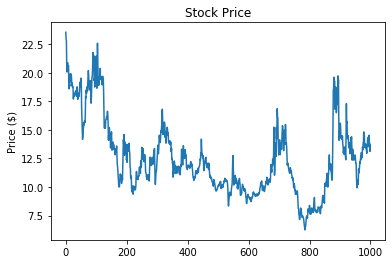

In [6]:
# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

plt.plot(df.index, df['Closing Price'])
plt.title('Stock Price')
plt.ylabel('Price ($)');
plt.show()

In [7]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import fbprophet

# Changepoint prior scale selection
df_fb = df.rename(columns={'Date': 'ds', 'Closing Price': 'y'})
def change_point_selection(df_fb,prior_range):
    train, test = train_test_split(df_fb[['ds','y']], test_size=0.2)
    
    test_error = []
    train_error = []
    
    for changepoint in prior_range:
        model = fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=changepoint)
        model.fit(train)
        
        yhat_train = model.predict(train)['yhat']
        yhat_test = model.predict(test)['yhat']
        
        train_error.append(metrics.mean_squared_error(yhat_train,train['y']))
        test_error.append(metrics.mean_squared_error(yhat_test,test['y']))
    
    error = {'prior_range':prior_range,'train_error':train_error,'test_error':test_error}
    error = pd.DataFrame(error)
    plt.figure(figsize=(10, 8))
    plt.plot(error['prior_range'], error['train_error'], 'b-', label = 'train error')
    plt.plot(error['prior_range'], error['test_error'], 'r-', label = 'test error')
    plt.xlabel('prior range'); plt.ylabel('MSE'); plt.title('MSE of Train vs Test')
    plt.legend();
    return error

/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1

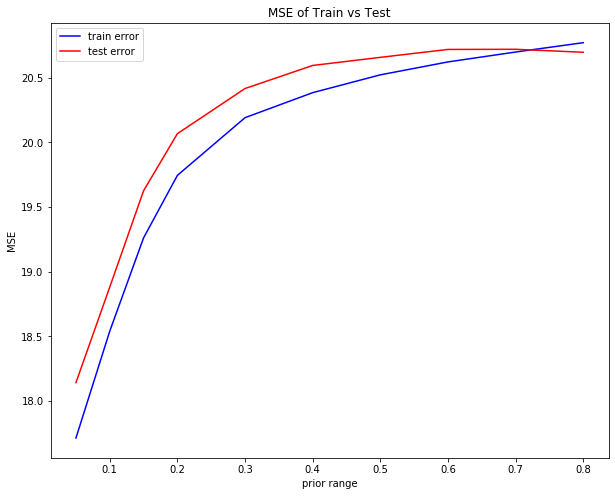

In [8]:
result = change_point_selection(df_fb,[0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


Potential 10 change points:
32    2018-01-04
64    2018-02-26
96    2018-04-13
128   2018-05-31
160   2018-07-17
192   2018-08-30
224   2018-10-23
256   2018-12-06
288   2019-01-23
320   2019-03-15
Name: ds, dtype: datetime64[ns]


Text(0.5, 1, 'Stock Price Prediction 300588')

<Figure size 720x576 with 0 Axes>

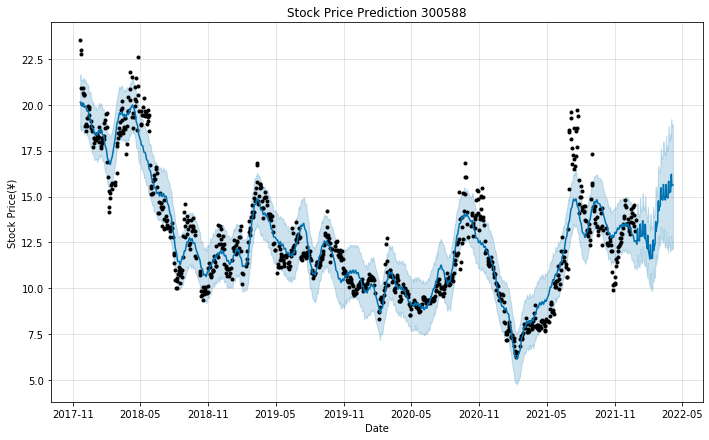

In [9]:
change_point = result['prior_range'].loc[result['test_error'] == min(result['test_error'])]

df_model = fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=0.15)
df_model.fit(df_fb)

x = len(df_fb)/10

df_future = df_model.make_future_dataframe(periods = int(x), freq='D')
df_future = df_model.predict(df_future)
 
print('Potential 10 change points:\n{}'.format(df_model.changepoints[:10]))
    

# Create the plot
plt.figure(figsize=(10, 8))
df_model.plot(df_future, xlabel = 'Date', ylabel = 'Stock Price(¥)')
plt.title('Stock Price Prediction %s'%a)